In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
magnificent_seven_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'NVDA', 'TSLA']
sp500_ticker = '^GSPC'

start_date = '2019-12-30'

magnificent_seven_data = yf.download(magnificent_seven_tickers, start=start_date)['Adj Close']
sp500_data = yf.download(sp500_ticker, start=start_date)['Adj Close']

combined_data = magnificent_seven_data.copy()
combined_data['S&P 500'] = sp500_data

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
combined_data.dropna(inplace=True)

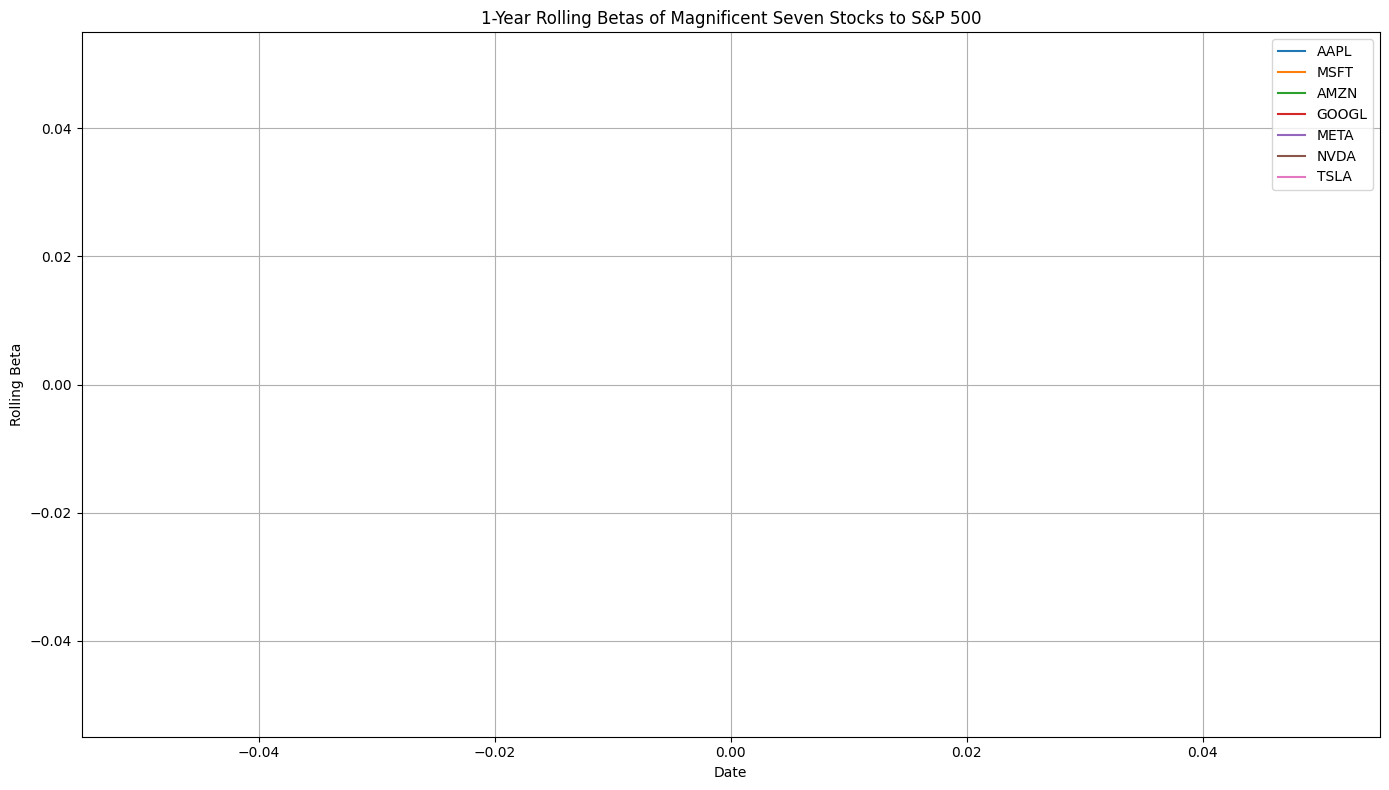

In [6]:
log_returns = np.log(combined_data / combined_data.shift(1)).dropna()

rolling_window = 252
rolling_betas = pd.DataFrame(index=log_returns.index, columns=magnificent_seven_tickers)

for stock in magnificent_seven_tickers:
    covariance = (
        log_returns[stock].rolling(rolling_window).cov(log_returns['S&P 500'])
    )
    variance = log_returns['S&P 500'].rolling(rolling_window).var()
    rolling_betas[stock] = covariance / variance

# Plot the rolling betas
plt.figure(figsize=(14, 8))
for stock in magnificent_seven_tickers:
    plt.plot(rolling_betas.index, rolling_betas[stock], label=stock)

plt.title('1-Year Rolling Betas of Magnificent Seven Stocks to S&P 500')
plt.xlabel('Date')
plt.ylabel('Rolling Beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()